# HW4_97110069

##### first we import the libraries we need

In [1]:
import pandas as pd
import datetime
import numpy as np
import jdatetime
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 8]
warnings.filterwarnings('ignore')

In [2]:
def get_shamsi_datetime(x):
    x = str(x)
    date = jdatetime.datetime.strptime(x, '%Y/%m/%d')
    return date

##### read and clean events data

In [3]:
'''we rename the column to latin, remove rows that dont have majma date and finally set majma date as index'''
def clean_events_data(df):
    df.rename(columns = {'نماد':'namad', 'تاریخ ثبت':'sabt date', 'تاریخ مجمع ':'majma date','سرمایه قبلی':'sarmaye qabli', 'سرمایه جدید':'sarmaye jadid','آورده نقدی':'avarde naqdi','سود انباشته':'soode anbashte','اندوخته':'andookhte'}, inplace = True)
    date_nan_indexes = df[df['majma date'].isna()].index
    df = df[~df.index.isin(date_nan_indexes)]
    df['majma date'] = df['majma date'].apply(lambda x: get_shamsi_datetime(x))
    df.set_index('majma date', inplace = True)
    return df
    

In [4]:
events = pd.read_excel('events.xlsx')
events = clean_events_data(events)
events

,Unnamed: 0,namad,sabt date,sarmaye qabli,sarmaye jadid,avarde naqdi,سود انباشته,اندوخته
majma date,,,,,,,,
1397-05-24 00:00:00,3,دريشمک,1397/07/04,114928,300000,NaN,184072.0,1000.0
1397-05-15 00:00:00,14,رانفور,1397/06/03,2800000,8400000,NaN,5600000.0,NaN
1397-05-11 00:00:00,12,کسرا,1397/05/30,509000,580000,NaN,71000.0,NaN
1397-04-27 00:00:00,18,سمتاز(سممتاز),1397/05/17,392040,600000,NaN,207960.0,NaN
1397-04-04 00:00:00,6,فرابورس,1397/06/25,700000,1000000,NaN,160000.0,140000.0
...,...,...,...,...,...,...,...,...
1388-12-20 00:00:00,925,وکار,1389/07/11,2000000,3000000,1000000.0,NaN,NaN
1388-11-14 00:00:00,931,سغرب,1389/03/12,187000,300000,88000.0,NaN,25000.0
1388-11-06 00:00:00,908,خريخت,1389/10/29,23607,50000,26393.0,NaN,NaN


##### read returns data

In [5]:
returns = pd.read_excel('return.xlsx')
returns['date'] = returns['date'].apply(lambda x : get_shamsi_datetime(x))
returns.set_index('date', inplace = True)
returns

,اخابر,آسيا,آكنتور,البرز,باختر,بالبر,بايكا,بترانس,بتك,بسويچ,...,وليز,ومعادن,ومعين,وملت,وملي,ونفت,ونوين,ونيرو,ونيكي,MR
date,,,,,,,,,,,,,,,,,,,,,
1387-09-17 00:00:00,0.000000,NaN,0.0,NaN,0.0,0.0,0.0,-2.150000,0.0,-0.190000,...,-0.210000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.005208
1387-09-18 00:00:00,0.000000,NaN,0.0,NaN,0.0,0.0,0.0,-1.144609,0.0,1.332532,...,-1.643451,0.000000,NaN,0.000000,0.000000,0.000000,-0.070000,0.000000,0.000000,-0.004523
1387-09-20 00:00:00,0.000000,NaN,0.0,NaN,0.0,0.0,0.0,-0.465212,0.0,0.138422,...,-0.621498,0.000000,NaN,0.000000,0.000000,0.000000,-0.040028,0.000000,-1.480000,-0.007206
1387-09-23 00:00:00,0.000000,NaN,0.0,NaN,0.0,0.0,0.0,-0.186955,0.0,0.651659,...,-0.492106,0.000000,NaN,0.000000,0.000000,0.000000,-0.440485,0.000000,0.000000,-0.005585
1387-09-24 00:00:00,0.000000,NaN,0.0,NaN,0.0,0.0,0.0,-2.778356,0.0,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-0.915033,0.000000,0.000000,-0.007389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394-02-08 00:00:00,-0.151172,-1.134429,0.0,0.900253,NaN,0.0,NaN,-2.734233,NaN,-0.290118,...,-0.773550,-0.742739,0.0,-0.167724,-0.120296,1.087522,-0.088402,0.000000,-0.667486,-0.001046
1394-02-09 00:00:00,-0.302801,-0.688731,0.0,2.189652,NaN,0.0,NaN,0.045130,NaN,-0.080042,...,0.132026,-0.124478,0.0,1.833455,-0.020647,1.630901,-0.045182,0.000000,-0.170940,0.001922
1394-02-13 00:00:00,-0.227790,-0.770269,0.0,-1.269631,NaN,0.0,NaN,-1.174593,NaN,-1.164779,...,-1.073649,-0.061600,0.0,-0.164981,0.000000,-0.577140,-1.154534,0.000000,0.000000,-0.008316


##### for each stock (column) we compute the standard deviation and save it in a dictionary

In [6]:
std_of_returns = {}
for stock in returns.columns:
    returns[f'{stock}_excess_return'] = returns[stock] - returns['MR']
    std_of_returns[stock] = returns[f'{stock}_excess_return'].std()


##### plotting the std of stocks, there is probably an error in data of 2 stocks (with really high std)

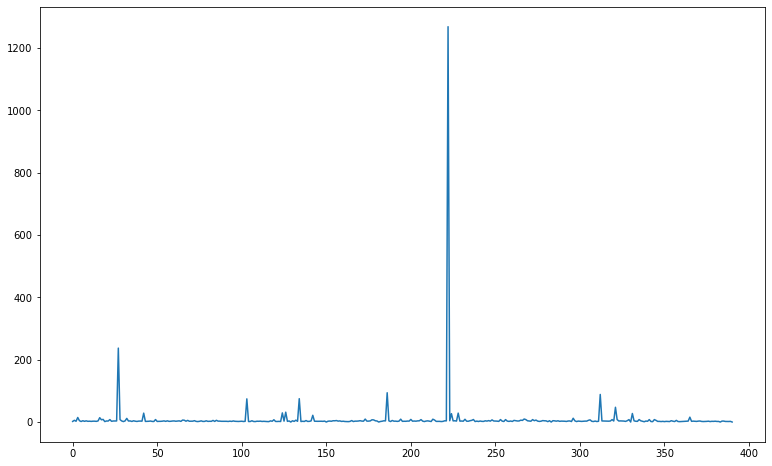

In [7]:
plt.plot(std_of_returns.values())

##### for each event we find that whether there is a significant return in the event window

In [13]:
'''get 80 days before and 10 days after for a date'''
def get_time_range(date):   
    list_of_dates = []
    for i in range(-80,11):
        date_to_add = date + datetime.timedelta(days = i)
        if date_to_add in returns.index:
            list_of_dates.append(date_to_add)
    return list_of_dates

'''check if an event window contains significant returns'''
def check_significant_return(df, stock_name, period): 
    df = df.loc[period]
    if stock_name in std_of_returns:
#         global s
#         s += 1
        significance_level = 1.96 * std_of_returns[stock_name]
        if len(df[np.abs(df[f'{stock_name}_excess_return']) > significance_level]) > 0:
            return 1
        else:
            return 0

'''some majma dates for a stock have occured more than once in events dataframe(because we have
more than one sabt dates). So we use save the stocks we have checked.'''
unique_event_dates = {}   
# global s
# s = 0
# r = 0
# t = 0
events_dates = []
events['significance'] = np.nan
for i in range(len(events)):
    event = events.iloc[i]
    stock_name = event['namad']
    event_date = events.index[i]
    event_period = get_time_range(event_date)
    if len(event_period) > 0:
#         r += 1
        if stock_name in unique_event_dates and unique_event_dates[stock_name] == event_date:
            pass
        else:
#             t += 1
            unique_event_dates[stock_name] = event_date
            try:
                events['significance'].iloc[i] = check_significant_return(returns, stock_name, event_period)
                events_dates.append(event_date)
            except Exception as e:
                pass
# print(s)
# print(t)
# print(r)


In [14]:
insiders = len(events[events['significance'] == 1])
non_insiders = len(events[events['significance'] == 0])
print('percentage of insider traders is:', insiders / (insiders + non_insiders))

percentage of insider traders is: 0.6827586206896552


we cannot say we have insider trading. Because on average we expect 5% of the returns (by random) to be significant. So when we look at 90 days and all of are data is about 8 years we are looking at about 3 percent of data. having a significant return in 68 % of the events is quite close to 3 % / 5%. So we cant say that we have an unusual return in the windows.

##### finding significant returns for days before and after whole events

In [15]:
'''for each event and for each i in [-80,10] we check whether the stock has an abnormal excess return on i days after
the event. Then we sum all of these numbers for each i'''
unique_event_dates = {}
significance_days = {}
for i in range(-80,11):
    significance_days[i] = 0
for i in range(len(events)):
    event = events.iloc[i]
    stock_name = event['namad']
    event_date = events.index[i]
    if stock_name in unique_event_dates and unique_event_dates[stock_name] == event_date:
            pass
    else:
        unique_event_dates[stock_name] = event_date
        for i in range(-80, 11):
            day_to_check = event_date + datetime.timedelta(days = i)
            if day_to_check in returns.index and stock_name in std_of_returns:
                if np.abs(returns.loc[day_to_check][f'{stock_name}_excess_return']) > std_of_returns[stock_name] * 1.96:
                    significance_days[i] += 1

        
        

Text(0.5, 0, 'day number')

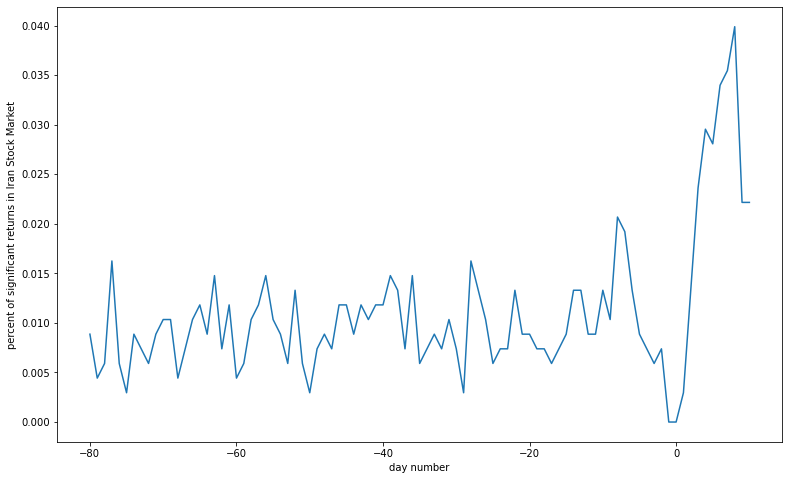

In [17]:
'''we have i(mentioned before) as the x_axis and the percent of abnormal returns for i days after the event in y_axis'''
factor=1.0/sum(significance_days.values())
for k in significance_days:
    significance_days[k] = significance_days[k]*factor
plt.plot(significance_days.keys(), significance_days.values())
plt.ylabel('percent of significant returns in Iran Stock Market')
plt.xlabel('day number')

The paper has divided the stocks of *Mexican Stock Market* into two groups :
1. A shares that are mostly holded by mexicans.
2. B shares that are mostly holded by foreigners.


As we can see in the image below, A shares which are shown with black line, dont have a change in the number of significant returns in the event day and the days after. This difference isn't much in B shares either. But at least the highest spike in B shares is around the event day. So the paper shows that there is insider trading in Mexican Stock Markets.
![](Capture.png)

But what we see in *Iran's Stock Market* shows that the number of significant returns increases on the event days and the next days. This shows that the stock prices react to the news very significantly that can be a proof that **we dont have insider trading in iran stock markets**.